<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/06_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splitting datasets

In training phase we usually use training and test datasets: the first one is used for training and the second one is used independent check that the model is not overfitting the training data.

If you go around the training loop enough times, adjusting the values of hyperparameters according to the performance of the model on the training and test datasets, the choice of hyperparameters may eventually reflect any bias in the combined training and test datasets.

In order to measure the bias inherent in the combined dataset used for hyperparameter tuning, it is common practice to hold back a **third dataset** and use this for final evaluation once training and hyperparameter tuning are complete. This is called the **validation dataset**.

So the datasets have the following use:
* the training dataset is used for training
* the validation dataset is used for hyperparameter tuning
* the test dataset is used for final evaluation once training and hyperparameter tuning are complete

The image below shows this process:

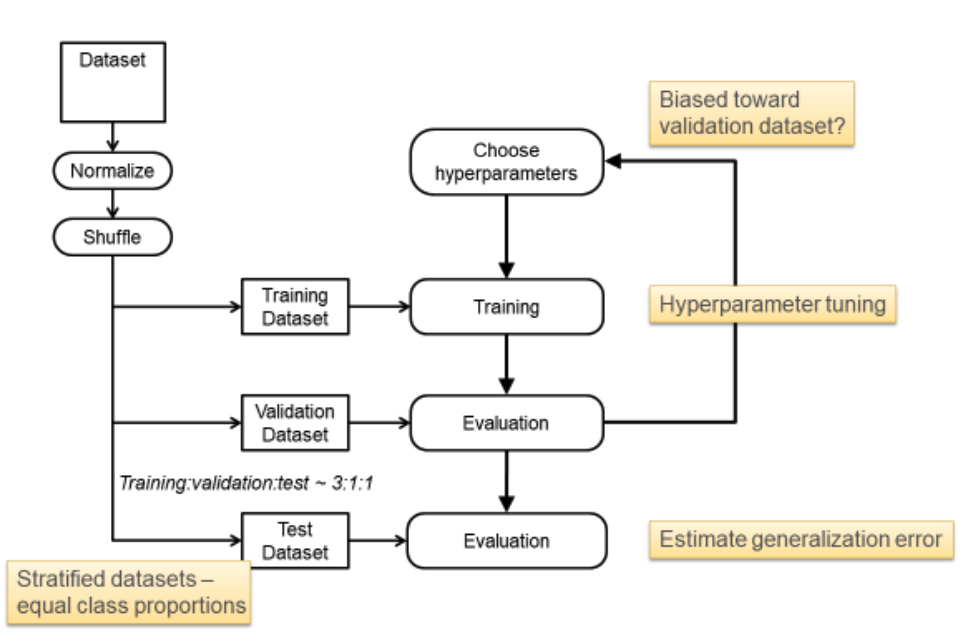



To improve accuracy a **K-fold cross-validation** is an alternative. K-fold cross-validation is a way to get the most out of a given dataset by using different parts of the dataset for validation on each training run, then calculating the average performance over multiple runs.

You could consider using K-fold cross validation on a small dataset in the early states of algorithm selection, but probably not when training a big network on a massive dataset.

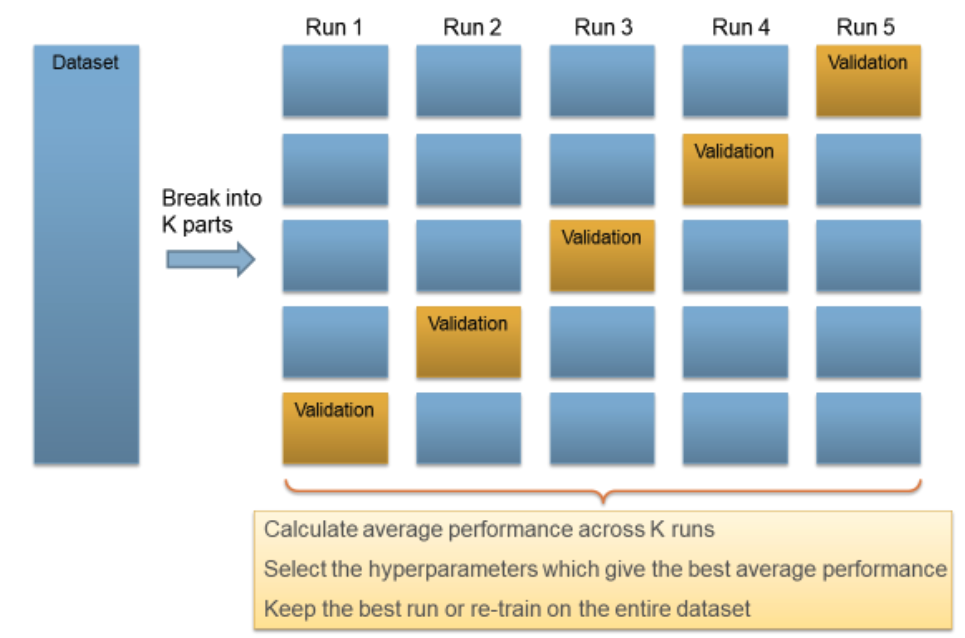

K-fold cross-validation is specifically a validation technique. It does not address the issue of which particular dataset you should use to train the final model. You could pick the best run or you could re-train the model on the entire dataset.

# notMNIST

The **notMNIST** dataset contains 28x28 pixel images of the letters A-J in various exotic typefaces. notMNIST was created by Yaroslav Bulatov. You can read about notMNIST [here](http://yaroslavvb.blogspot.co.uk/2011/09/notmnist-dataset.html) or download it from [here](http://yaroslavvb.com/upload/notMNIST/) or from [Kaggle](https://www.kaggle.com/lubaroli/notmnist).

notMNIST was inspired by the **MNIST** dataset created by LeCun, Cortes, and Burges. You can read about MNIST [here](http://yann.lecun.com/exdb/mnist/). 

Training/validation/test dataset shapes: (200000, 784) (10000, 784) (10000, 784)


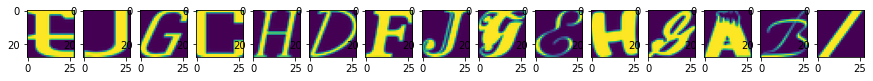

In [1]:
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# The dataset has been uploaded to Google Drive. Remember to mount it.
MODEL_PATH = "/content/drive/My Drive/Data/notMNIST.pickle"

with open(MODEL_PATH, 'rb') as file:
    data = pickle.load(file)
    # Training
    train_dataset = data['train_dataset']
    train_labels = data['train_labels']
    # Validation
    valid_dataset = data['valid_dataset']
    valid_labels = data['valid_labels']
    # Testing
    test_dataset  = data['test_dataset']
    test_labels  = data['test_labels']

n_labels = 10

train_dataset = train_dataset.reshape(-1, 784).astype(np.float32)
valid_dataset = valid_dataset.reshape(-1, 784).astype(np.float32)
test_dataset  = test_dataset.reshape(-1, 784).astype(np.float32)
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels  = to_categorical(test_labels)

print('Training/validation/test dataset shapes:', train_dataset.shape, valid_dataset.shape, test_dataset.shape)

n_train = train_dataset.shape[0]
n_valid = valid_dataset.shape[0]
n_test = test_dataset.shape[0]

# Plot a few examples so we can visualize the dataset
image_size = 28
n = 15
train_x, train_y = (train_dataset[:n], train_labels[:n])
train_x = train_x.reshape(-1,image_size,image_size)

plt.rcParams["figure.figsize"] = (15,1)
fig = plt.figure()
for i in range(n):
    a = fig.add_subplot(1,n,i+1)
    plt.imshow(train_x[i])
plt.show()

In [3]:
import tensorflow
from tensorflow.keras.models        import Sequential
from tensorflow.keras.layers        import Dense
from tensorflow.keras.regularizers  import l2
from tensorflow.keras.optimizers    import SGD, Adam

num_hidden     = 128   # Number of units in each hidden layer
minibatch_size = 100   # Size of the minibatch used for stochastic gradient descent

def build_and_run_graph(num_layers, Lambda, n_epochs, learning_rate):
    tensorflow.keras.backend.clear_session()

    model = Sequential()
    model.add(Dense(input_shape=(image_size*image_size,), units=num_hidden, activation='relu', kernel_regularizer=l2(Lambda)))
    
    for i in range(1,num_layers):
        model.add(Dense(units=num_hidden, activation='relu', kernel_regularizer=l2(Lambda)))
    
    model.add(Dense(units=n_labels, activation='softmax', kernel_regularizer=l2(Lambda)))
    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate),
                  metrics=['accuracy'])

    model.fit(train_dataset,
              train_labels,
              epochs=n_epochs,
              batch_size=minibatch_size,
              shuffle=True)

In [4]:
build_and_run_graph(num_layers = 2, Lambda = 0.0004, n_epochs = 10, learning_rate = 0.01)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.9118 - accuracy: 0.7890
Epoch 2/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.7044 - accuracy: 0.8387
Epoch 3/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6662 - accuracy: 0.8481
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss

In [5]:
num_hidden     = 128   # Number of units in each hidden layer
minibatch_size = 100   # Size of the minibatch used for stochastic gradient descent

def build_and_run_graph2(num_layers, Lambda, n_epochs, learning_rate):
    tensorflow.keras.backend.clear_session()

    model = Sequential()
    model.add(Dense(input_shape=(image_size*image_size,), units=num_hidden, activation='relu', kernel_regularizer=l2(Lambda)))
    for i in range(1,num_layers):
        model.add(Dense(units=num_hidden, activation='relu', kernel_regularizer=l2(Lambda)))
    model.add(Dense(units=n_labels, activation='softmax', kernel_regularizer=l2(Lambda)))
    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=learning_rate),
                  metrics=['accuracy']) # Those are the metrics to monitor. It could be top2, top5

    model.fit(train_dataset,
              train_labels,
              epochs=n_epochs,
              batch_size=minibatch_size,
              shuffle=True,
              validation_data=(valid_dataset, valid_labels)) # This is the validation for hyperparameters tuning
    
    # Let's use the test dataset to have evaluate the model
    loss_and_acc = model.evaluate(test_dataset,
                                  test_labels,
                                  batch_size=minibatch_size,
                                  verbose=0)
    print('Test loss = {:6.3f}, Test accuracy = {:4.1f}'.format(loss_and_acc[0], loss_and_acc[1]*100))

In [ ]:
build_and_run_graph2(num_layers = 2, Lambda = 0.003, n_epochs = 10, learning_rate = 0.001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.8221 - accuracy: 0.8380 - val_loss: 0.6972 - val_accuracy: 0.8444
Epoch 2/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6766 - accuracy: 0.8505 - val_loss: 0.6795 - val_accuracy: 0.8512
Epoch 3/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6664 - accurac